In [1]:
import pandas as pd
from sklearn import *

/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
/anaconda3/li

In [2]:
df = pd.read_csv("/data/credit-default.csv")
df.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_length,installment_rate,personal_status,other_debtors,...,property,age,installment_plan,housing,existing_credits,default,dependents,telephone,foreign_worker,job
0,< 0 DM,6,critical,radio/tv,1169,unknown,> 7 yrs,4,single male,none,...,real estate,67,none,own,2,1,1,yes,yes,skilled employee
1,1 - 200 DM,48,repaid,radio/tv,5951,< 100 DM,1 - 4 yrs,2,female,none,...,real estate,22,none,own,1,2,1,none,yes,skilled employee
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 yrs,2,single male,none,...,real estate,49,none,own,1,1,2,none,yes,unskilled resident
3,< 0 DM,42,repaid,furniture,7882,< 100 DM,4 - 7 yrs,2,single male,guarantor,...,building society savings,45,none,for free,1,1,2,none,yes,skilled employee
4,< 0 DM,24,delayed,car (new),4870,< 100 DM,1 - 4 yrs,3,single male,none,...,unknown/none,53,none,for free,2,2,2,none,yes,skilled employee


In [3]:
df.default.value_counts()

1    700
2    300
Name: default, dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
checking_balance        1000 non-null object
months_loan_duration    1000 non-null int64
credit_history          1000 non-null object
purpose                 1000 non-null object
amount                  1000 non-null int64
savings_balance         1000 non-null object
employment_length       1000 non-null object
installment_rate        1000 non-null int64
personal_status         1000 non-null object
other_debtors           1000 non-null object
residence_history       1000 non-null int64
property                1000 non-null object
age                     1000 non-null int64
installment_plan        1000 non-null object
housing                 1000 non-null object
existing_credits        1000 non-null int64
default                 1000 non-null int64
dependents              1000 non-null int64
telephone               1000 non-null object
foreign_worker          1000 non-null object
jo

In [40]:
target = "default"
X = df.drop(columns=[target]) # Features
y = preprocessing.LabelEncoder().fit_transform(df[target]) # target variable

X = pd.get_dummies(X, drop_first=True) # One hot encoding

# Randomly split the data into training and test test. 
# Keeping 30% of the records in test set.
# random_state creates a reproducible set of random samples 
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y
                                , test_size = 0.3, random_state = 1)


pipe = pipeline.Pipeline([
    ("poly", preprocessing.PolynomialFeatures(degree=1, include_bias=False)),
    ("scaler", preprocessing.StandardScaler()),
    ("est", linear_model.LogisticRegression())
])
pipe.fit(X_train, y_train)

y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)


In [6]:
pd.DataFrame({"actual": y_test, "prediction": y_test_pred})

,actual,prediction
0,1,0
1,0,1
2,0,0
3,1,1
4,1,1
5,0,1
6,0,0
7,0,0
8,0,0
9,0,0


In [7]:
metrics.confusion_matrix(y_test, y_test_pred)

array([[188,  26],
       [ 47,  39]])

In [11]:
len(y_test)

300

In [12]:
188 + 26 + 47+39

300

In [10]:
metrics.accuracy_score(y_test, y_test_pred)

0.7566666666666667

In [13]:
(188+39)/300

0.7566666666666667

In [14]:
pd.Series(y_train).value_counts()

0    486
1    214
dtype: int64

In [15]:
pd.Series(y_train).value_counts()/700

0    0.694286
1    0.305714
dtype: float64

In [16]:
pd.Series(y_test).value_counts()/300

0    0.713333
1    0.286667
dtype: float64

In [23]:
y_test_prob = pipe.predict_proba(X_test)[:, 1]
y_test_pred = np.where(y_test_prob > 0.2, 1, 0)
metrics.confusion_matrix(y_test, y_test_pred)

array([[  0, 214],
       [  0,  86]])

In [25]:
pipe.predict_proba(X_test)

array([[0.60942826, 0.39057174],
       [0.06296356, 0.93703644],
       [0.79342979, 0.20657021],
       [0.38481487, 0.61518513],
       [0.15736586, 0.84263414],
       [0.35354373, 0.64645627],
       [0.5505209 , 0.4494791 ],
       [0.7405012 , 0.2594988 ],
       [0.92922818, 0.07077182],
       [0.786845  , 0.213155  ],
       [0.17783219, 0.82216781],
       [0.52077005, 0.47922995],
       [0.89371386, 0.10628614],
       [0.95072213, 0.04927787],
       [0.62948114, 0.37051886],
       [0.59845164, 0.40154836],
       [0.97615244, 0.02384756],
       [0.91365389, 0.08634611],
       [0.96326422, 0.03673578],
       [0.1283775 , 0.8716225 ],
       [0.82652947, 0.17347053],
       [0.31581623, 0.68418377],
       [0.91710376, 0.08289624],
       [0.91664736, 0.08335264],
       [0.79798108, 0.20201892],
       [0.85722239, 0.14277761],
       [0.88800216, 0.11199784],
       [0.77276132, 0.22723868],
       [0.91060526, 0.08939474],
       [0.1085739 , 0.8914261 ],
       [0.

In [24]:
y_test_prob

array([0.39057174, 0.93703644, 0.20657021, 0.61518513, 0.84263414,
       0.64645627, 0.4494791 , 0.2594988 , 0.07077182, 0.213155  ,
       0.82216781, 0.47922995, 0.10628614, 0.04927787, 0.37051886,
       0.40154836, 0.02384756, 0.08634611, 0.03673578, 0.8716225 ,
       0.17347053, 0.68418377, 0.08289624, 0.08335264, 0.20201892,
       0.14277761, 0.11199784, 0.22723868, 0.08939474, 0.8914261 ,
       0.3687219 , 0.03176349, 0.45735348, 0.21773117, 0.30430631,
       0.92027889, 0.24340843, 0.4961519 , 0.1303132 , 0.0819819 ,
       0.09401154, 0.58658622, 0.009761  , 0.49218681, 0.04921602,
       0.03568655, 0.10812248, 0.27239898, 0.0533497 , 0.10149276,
       0.22215534, 0.45281983, 0.59676824, 0.51534091, 0.22166303,
       0.1454495 , 0.58814834, 0.65672602, 0.02847046, 0.59138439,
       0.43687783, 0.07374869, 0.52003891, 0.01800186, 0.56258666,
       0.25013105, 0.18103621, 0.05744698, 0.8604261 , 0.93227089,
       0.16641523, 0.22303058, 0.03080095, 0.59138775, 0.14556

In [29]:
import matplotlib.pyplot as plt

Text(0.5,1,'ROC, auc = 0.758476418169963')

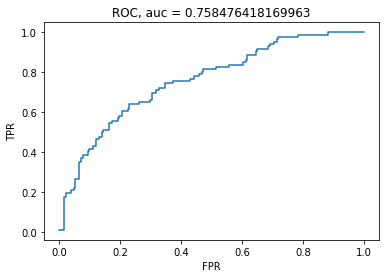

In [35]:
fpr, tpr, _ = metrics.roc_curve(y_test, y_test_prob)
plt.plot(fpr, tpr)
plt.xlabel("FPR")
plt.ylabel("TPR")
auc = metrics.auc(fpr, tpr)
plt.title("ROC, auc = " + str(auc))
# auc: indicates the goodness of the model. Range is between (0, 1), closer to 1 is better
# best value of auc is 1.
# auc is a scoring of a model which is independent of the threshold values.
# auc is used for model selection

In [37]:
est = pipe.steps[-1][-1]

In [70]:
target = "default"
X = df.drop(columns=[target]) # Features
y = preprocessing.LabelEncoder().fit_transform(df[target]) # target variable

X = pd.get_dummies(X, drop_first=True) # One hot encoding

# Randomly split the data into training and test test. 
# Keeping 30% of the records in test set.
# random_state creates a reproducible set of random samples 
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y
                                , test_size = 0.3, random_state = 1)


pipe = pipeline.Pipeline([
    ("poly", preprocessing.PolynomialFeatures(degree=1, include_bias=False)),
    ("scaler", preprocessing.StandardScaler()),
    #("est", linear_model.LogisticRegression(C=0.02, penalty="l1"))
    ("est", linear_model.SGDClassifier(loss="log", alpha=0.04, penalty="l1", max_iter=2000))
])
pipe.fit(X_train, y_train)

est = pipe.steps[-1][-1]
summary = pd.DataFrame({"feature": X.columns, "cofficient": est.coef_[0]})
summary.loc[summary.cofficient.abs().sort_values(ascending = False).index]

,feature,cofficient
9,checking_balance_unknown,-0.411035
0,months_loan_duration,0.250450
7,checking_balance_< 0 DM,0.172145
11,credit_history_fully repaid,0.126582
15,purpose_car (used),-0.079263
41,housing_own,-0.029082
26,savings_balance_unknown,-0.010011
13,credit_history_repaid,0.000000
20,purpose_radio/tv,0.000000
19,purpose_others,0.000000
